In [2]:
import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
import re
from datetime import datetime

# Append paths for custom modules
sys.path.append(os.path.abspath("../mathematical_models"))
from mathematical_models.f_on_f import FunctionOnFunctionModel

sys.path.append(os.path.abspath("../optimizers"))
from optimizers.cordex_continuous import CordexContinuous

sys.path.append(os.path.abspath("../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.basis import plot_design, Basis

In [3]:
results = pd.read_csv("results_db.tsv", sep='\t')

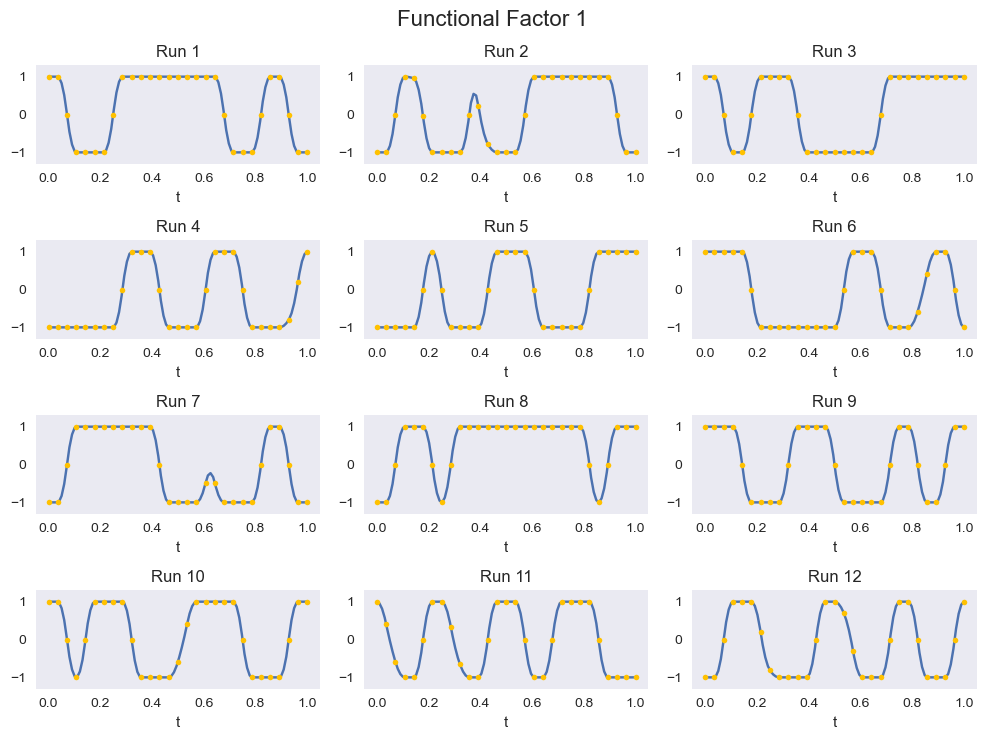

Plot saved for row 575 with name: 1000_100_12_bpslines_2_29_bsplines_2_8
All plots saved!


In [4]:
for index, row in results.iterrows():
    if index < 575:
        continue
    output_dir = "plots"
    os.makedirs(output_dir, exist_ok=True)

    # Extract necessary fields for naming
    epochs = row.get('epochs', 'unknown_epochs')
    refinement = row.get('refinement', 'unknown_refinement')
    Runs = row.get('Runs', 'unknown_runs')
    X_type = row.get('X family', 'unknown_X_type')
    X_degree = row.get('X degree', 'unknown_X_degree')
    X_breaks = row.get('X breaks', 'unknown_X_breaks')
    B_type = row.get('B family', 'unknown_B_type')
    B_degree = row.get('B degree', 'unknown_B_degree')
    B_breaks = row.get('B breaks', 'unknown_B_breaks')

    # Construct the name based on the specified naming convention
    name = f"{epochs}_{refinement}_{Runs}_{X_type}_{X_degree}_{X_breaks}_{B_type}_{B_degree}_{B_breaks}"

    # Extract and prepare basis functions
    x_bases = [
        BSplineBasis(
            degree=int(row['X degree']),
            total_knots_num=int(row['X breaks'])
        )
    ]

    N = int(row['Runs'])

    # Parse the 'criterion' field
    try:
        objective_value = ast.literal_eval(row['criterion'])
        if objective_value > 1000:
            print(f"Invalid criterion value in row {index}. Skipping this row.")
            plt.savefig(os.path.join(output_dir, name))
            continue
    except (ValueError, SyntaxError):
        print(f"Invalid criterion value in row {index}. Skipping this row.")
        plt.savefig(os.path.join(output_dir, name))
        continue

    # Extract the number of basis functions
    num_of_basis = row['X breaks']

    # Parse the 'design' string into a NumPy array
    design_str = row.get('design', '[]').strip('[]')
    rows_str = design_str.split('] [')
    design_list = []
    for row_str in rows_str:
        row_str = row_str.replace('[', '').replace(']', '')
        numbers_str = row_str.strip().split()
        try:
            row_values = [float(num) for num in numbers_str]
            design_list.append(row_values)
        except ValueError:
            print(f"Invalid design values in row {index}. Skipping this row.")
            design_list = []
            break  # Skip this row if design parsing fails

    if not design_list:
        continue  # Skip plotting if design parsing failed

    best_design = np.array(design_list).reshape(N, -1)



    # Generate and save the plot
    try:
        plot_design(
            best_design,
            x_bases,
            N,
            sub_x=4,
            sub_y=3,
            colour="#FFC100",
            # figsize=(10, 7.5),
            name=os.path.join(output_dir, name)
        )
        print(f"Plot saved for row {index} with name: {name}")
    except Exception as e:
        print(f"Failed to plot for row {index} with name: {name}. Error: {e}")
print("All plots saved!")